### Importing the necessary libraries


In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

from warnings import filterwarnings
filterwarnings('ignore')

 **Data Cleaning:** <br>
- Deleting redundant columns.
 - Renaming the columns.
 - Dropping duplicates.
 - Cleaning individual columns.
 - Remove the NaN values from the dataset
 - #Some Transformations

In [2]:
zomato_real = pd.read_csv('zomato_pune.csv')
zomato_real.head()

,Restaurant_Name,Web_Link,Locality,Sponsored,Ratings_out_of_5,Number of votes,Phone_number,Cuisines,Charges_for_two,payment_modes,...,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Serves Halal,Takeaway Only,BYOB Only,spam_review
0,AB's - Absolute Barbecues,https://www.zomato.com/pune/abs-absolute-barbe...,Hinjawadi,Casual Dining,4.9,7029 votes,+91 9373112211,"Continental, North Indian, Chinese","₹1,400",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,1539.0
1,Cafe Co2 Resto Lounge,https://www.zomato.com/pune/cafe-co2-resto-lou...,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,080 46971866,"North Indian, Chinese, Continental, Kebab, Sea...","₹1,500",Cash and Cards accepted,...,1,0,0,0,0,0,0,0,0,139.0
2,Paasha - JW Marriott Pune,https://www.zomato.com/pune/paasha-jw-marriott...,Senapati Bapat Road,Fine Dining,4.6,3291 votes,080 46971369,"North Indian, Kebab, Biryani","₹2,500","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,119.0
3,I Amsterdam,https://www.zomato.com/pune/i-amsterdam-hinjawadi,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,+91 8669698666 +91 8669697666,"Asian, European, Modern Indian, Italian","₹1,400","Cash,Cards and Digital Payments accepted",...,1,0,0,0,0,0,0,0,0,8.0
4,FC Road Social,https://www.zomato.com/pune/fc-road-social-shi...,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,+91 9172378889 020 29805112,"North Indian, Chinese, Biryani, American, Cont...","₹1,500","Cash,Cards and Digital Payments accepted",...,0,0,0,1,0,0,0,0,0,132.0


In [37]:
zomato_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12189 entries, 0 to 12188
Columns: 104 entries, Restaurant_Name to spam_review
dtypes: float64(1), int32(1), int64(86), object(16)
memory usage: 9.6+ MB


In [4]:
zomato_real.columns.to_list()

['Restaurant_Name',
 'Web_Link',
 'Locality',
 'Sponsored',
 'Ratings_out_of_5',
 'Number of votes',
 'Phone_number',
 'Cuisines',
 'Charges_for_two',
 'payment_modes',
 'Rest_timming',
 'Detail_address',
 '5_star_review_percentage',
 '4_star_review_percentage',
 '3_star_review_percentage',
 '2_star_review_percentage',
 '1_star_review_percentage',
 'Wine and Beer',
 'Dance Floor',
 'Lunch Menu',
 'Outdoor Seating',
 'Seaside',
 '4/5 Star',
 'Free Parking',
 'Pet Friendly',
 'Bulk Orders Accepted',
 'Gaming Are',
 'City View',
 'Vegetarian Only',
 'Brunch',
 'Live Music',
 'Wheelchair Accessible',
 'Home Delivery',
 'Celebrity Frequented',
 'Pre-Ordering Required',
 'Pool Table',
 'Keto Options',
 'Wifi',
 'Sports TV',
 'Wine Tasting',
 'Beer',
 'Restricted Entry',
 'Variable Menu',
 'Serves Non Veg',
 'Table booking for Groups',
 'Poolside',
 'Home Baker',
 'Wine',
 'Buffet',
 'Board Games',
 'Vegan Options',
 'Table Reservation Not Required',
 'Table reservation required',
 'Rooftop',

In [38]:
zomato = zomato_real.drop(['Web_Link','BYOB Only','Drive in','Drive Thru','Unlimited Pizz','Sugar Free Options','Private Dining Area Available',
                          'Egg Preparations','No Alcohol Available','Karaoke','Mall Parking','Valet Parking Available','Home Baker','Restricted Entry',
                          'Seating Not Available','Wine Tasting','Seaside','Charges_for_two','Live Music','Smoking Are','Serves Halal','spam_review',
                          'Karaoke','Standing Tables','Members Only','Group Meal'], axis=1)

In [40]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12189 entries, 0 to 12188
Data columns (total 79 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Restaurant_Name                 12189 non-null  object
 1   Locality                        12189 non-null  object
 2   Sponsored                       12189 non-null  object
 3   Ratings_out_of_5                12189 non-null  object
 4   Number of votes                 12189 non-null  object
 5   Phone_number                    12189 non-null  object
 6   Cuisines                        12189 non-null  object
 7   payment_modes                   12189 non-null  object
 8   Rest_timming                    12189 non-null  object
 9   Detail_address                  12189 non-null  object
 10  5_star_review_percentage        12189 non-null  object
 11  4_star_review_percentage        12189 non-null  object
 12  3_star_review_percentage        12189 non-null

In [7]:
zomato.head()

,Restaurant_Name,Locality,Sponsored,Ratings_out_of_5,Number of votes,Phone_number,Cuisines,payment_modes,Rest_timming,Detail_address,...,Self Service,Delivery Only,LGBTQIA Friendly,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast,Catering Available,Disabled Friendly,Takeaway Only
0,AB's - Absolute Barbecues,Hinjawadi,Casual Dining,4.9,7029 votes,+91 9373112211,"Continental, North Indian, Chinese",Cash and Cards accepted,"12noon – 4:30pm, 6:30pm – 11:30pm","Shop 206, 2nd Floor, White Square Building, Op...",...,0,0,0,1,0,0,0,0,0,0
1,Cafe Co2 Resto Lounge,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,080 46971866,"North Indian, Chinese, Continental, Kebab, Sea...",Cash and Cards accepted,11am – 4am,"Near Manas Lake, Bhugaon, Pune",...,0,0,0,1,0,0,0,0,0,0
2,Paasha - JW Marriott Pune,Senapati Bapat Road,Fine Dining,4.6,3291 votes,080 46971369,"North Indian, Kebab, Biryani","Cash,Cards and Digital Payments accepted",5:30pm – 12:30am,"JW Marriott, Senapati Bapat Road, Pune",...,0,0,0,1,0,0,0,0,0,0
3,I Amsterdam,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,+91 8669698666 +91 8669697666,"Asian, European, Modern Indian, Italian","Cash,Cards and Digital Payments accepted",12noon – 1am,"Survey 257/1/1A, Near Raj Laxmi Petrol Pump, P...",...,0,0,0,1,0,0,0,0,0,0
4,FC Road Social,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,+91 9172378889 020 29805112,"North Indian, Chinese, Biryani, American, Cont...","Cash,Cards and Digital Payments accepted",9am – 1am,"CTS 1183, Unit 101, 1st Floor, Mezzanine Floor...",...,0,0,1,0,0,0,1,0,0,0


In [41]:
z= zomato.drop(['Disabled Friendly','Catering Available','Table booking not available','Takeaway Only','Delivery Only',
               'Self Service','Entry Fee','Table booking not available','Craft Beer','Serves Cocktails','Gastro Pub','Live Entertainment',
               'Card Upon Delivery','Available for Functions','Live Sports Screening','Table Reservation Not Required','Board Games',
               'Buffet','Wine','Poolside','Pool Table','Beer','BYOB','Table booking for Groups','Sports TV','Pre-Ordering Required',
               'Celebrity Frequented','Outdoor Seating','City View','Gaming Are','Bulk Orders Accepted','Wine and Beer','Phone_number'],axis=1) 

In [42]:
z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12189 entries, 0 to 12188
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Restaurant_Name             12189 non-null  object
 1   Locality                    12189 non-null  object
 2   Sponsored                   12189 non-null  object
 3   Ratings_out_of_5            12189 non-null  object
 4   Number of votes             12189 non-null  object
 5   Cuisines                    12189 non-null  object
 6   payment_modes               12189 non-null  object
 7   Rest_timming                12189 non-null  object
 8   Detail_address              12189 non-null  object
 9   5_star_review_percentage    12189 non-null  object
 10  4_star_review_percentage    12189 non-null  object
 11  3_star_review_percentage    12189 non-null  object
 12  2_star_review_percentage    12189 non-null  object
 13  1_star_review_percentage    12189 non-null  ob

In [44]:
z.duplicated().sum()

55

In [45]:
z.drop_duplicates(inplace=True)
z.head()

,Restaurant_Name,Locality,Sponsored,Ratings_out_of_5,Number of votes,Cuisines,payment_modes,Rest_timming,Detail_address,5_star_review_percentage,...,Nightlife,Kid Friendly,All Day Breakfast,Gluten Free Options,Full Bar Available,LGBTQIA Friendly,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast
0,AB's - Absolute Barbecues,Hinjawadi,Casual Dining,4.9,7029 votes,"Continental, North Indian, Chinese",Cash and Cards accepted,"12noon – 4:30pm, 6:30pm – 11:30pm","Shop 206, 2nd Floor, White Square Building, Op...",79%,...,0,0,0,0,1,0,1,0,0,0
1,Cafe Co2 Resto Lounge,Bhugaon,"Lounge, Casual Dining",4.6,2578 votes,"North Indian, Chinese, Continental, Kebab, Sea...",Cash and Cards accepted,11am – 4am,"Near Manas Lake, Bhugaon, Pune",61%,...,1,0,0,0,1,0,1,0,0,0
2,Paasha - JW Marriott Pune,Senapati Bapat Road,Fine Dining,4.6,3291 votes,"North Indian, Kebab, Biryani","Cash,Cards and Digital Payments accepted",5:30pm – 12:30am,"JW Marriott, Senapati Bapat Road, Pune",62%,...,0,0,0,0,1,0,1,0,0,0
3,I Amsterdam,Hinjawadi,"Casual Dining, Bar",4.3,430 votes,"Asian, European, Modern Indian, Italian","Cash,Cards and Digital Payments accepted",12noon – 1am,"Survey 257/1/1A, Near Raj Laxmi Petrol Pump, P...",45%,...,0,0,0,0,1,0,1,0,0,0
4,FC Road Social,Shivaji Nagar,"Bar, Casual Dining",4.5,2138 votes,"North Indian, Chinese, Biryani, American, Cont...","Cash,Cards and Digital Payments accepted",9am – 1am,"CTS 1183, Unit 101, 1st Floor, Mezzanine Floor...",63%,...,1,0,0,0,1,1,0,0,0,1


In [46]:
z.isnull().sum()


Restaurant_Name               0
Locality                      0
Sponsored                     0
Ratings_out_of_5              0
Number of votes               0
Cuisines                      0
payment_modes                 0
Rest_timming                  0
Detail_address                0
5_star_review_percentage      0
4_star_review_percentage      0
3_star_review_percentage      0
2_star_review_percentage      0
1_star_review_percentage      0
Dance Floor                   0
Lunch Menu                    0
4/5 Star                      0
Free Parking                  0
Pet Friendly                  0
Vegetarian Only               0
Brunch                        0
Wheelchair Accessible         0
Home Delivery                 0
Keto Options                  0
Wifi                          0
Variable Menu                 0
Serves Non Veg                0
Vegan Options                 0
Table reservation required    0
Rooftop                       0
Luxury Dining                 0
Desserts

### Different localities

In [47]:
z['Locality'].unique()

array(['Hinjawadi', 'Bhugaon', 'Senapati Bapat Road', 'Shivaji Nagar',
       'Wakad', 'East Street', 'Yerawada', 'Bavdhan', 'Kalyani Nagar',
       'Narhe', 'Bund Garden Road', 'Viman Nagar', 'Magarpatta',
       'Deccan Gymkhana', 'Hadapsar', 'Baner', 'Sus', 'Shivapur',
       'Mundhwa', 'FC Road', 'Kothrud', 'Koregaon Park', 'Erandwane',
       'MG Road', 'Karve Nagar', 'Sadashiv Peth', 'Pune University',
       'JM Road', 'Dhole Patil Road', 'Camp Area', 'Pimple Saudagar',
       'Kharadi', 'Ravet', 'Aundh', 'Nigdi', 'Kondhwa', 'Swargate',
       'Katraj', 'Khadki', 'Salunkhe Vihar Road', 'Law College Road',
       'Pimple Nilakh', 'Pashan', 'Lonavala', 'NIBM Road', 'Balewadi',
       'Dange Chowk', 'SB Road - Aundh', 'Pimpri Chinchwad Area',
       'Wadgaon Sheri', 'Pimpri', 'Wanowrie Kondhwa Area', 'Chinchwad',
       'Chandan Nagar', 'Fatima Nagar', 'Budhwar Peth', 'Warje',
       'Wagholi', 'Akurdi', 'Bibvewadi', 'Rasta Peth', 'KP and Kalyani',
       'Sinhgad Road', 'Model Col

In [48]:
z['Ratings_out_of_5'].unique()

array(['4.9', '4.6', '4.3', '4.5', '4.0', '4.7', '4.2', '4.4', '4.1',
       '3.7', '0', '4.8', '3.9', '3.6', '3.4', '3.8', '2.9', '3.5', '3.2',
       '3.3', '2.1', '2.5', '2.4', '3.0', '3.1', '2.7', '2.6', '2.8',
       '2.3', '-', '2.2', '2.0', '3', '4'], dtype=object)

In [49]:
z.replace('-',0 ,inplace=True)
z['Ratings_out_of_5']=z['Ratings_out_of_5'].astype(float) #changing the datatype of rate from object to float

In [50]:
z['Ratings_out_of_5'].unique()

array([4.9, 4.6, 4.3, 4.5, 4. , 4.7, 4.2, 4.4, 4.1, 3.7, 0. , 4.8, 3.9,
       3.6, 3.4, 3.8, 2.9, 3.5, 3.2, 3.3, 2.1, 2.5, 2.4, 3. , 3.1, 2.7,
       2.6, 2.8, 2.3, 2.2, 2. ])

### Popular Restaurants in Pune

In [51]:
z[z['Ratings_out_of_5'] > 4.8]


,Restaurant_Name,Locality,Sponsored,Ratings_out_of_5,Number of votes,Cuisines,payment_modes,Rest_timming,Detail_address,5_star_review_percentage,...,Nightlife,Kid Friendly,All Day Breakfast,Gluten Free Options,Full Bar Available,LGBTQIA Friendly,Table booking recommended,Resto Bar,Serves Alcohol,Breakfast
0,AB's - Absolute Barbecues,Hinjawadi,Casual Dining,4.9,7029 votes,"Continental, North Indian, Chinese",Cash and Cards accepted,"12noon – 4:30pm, 6:30pm – 11:30pm","Shop 206, 2nd Floor, White Square Building, Op...",79%,...,0,0,0,0,1,0,1,0,0,0
43,Babylon Craft Brewery,Erandwane,Microbrewery,4.9,Based on 216 votes,"North Indian, Chinese, Continental, Mughlai, A...",Cash and Cards accepted,11am – 12midnight,"6th Floor, House Of Nosh, CTS 1365, Gulawani M...",70%,...,1,1,0,0,1,0,1,1,0,0
91,Pop Tate's,Viman Nagar,"Bar, Casual Dining",4.9,1944 votes,"Continental, Italian, Chinese","Cash,Cards and Digital Payments accepted",11:30am – 1am,"Shop T08, 3rd Floor, Phoenix Market City Mall,...",77%,...,1,0,0,0,1,0,0,0,0,0
98,Cafe Paashh,Kalyani Nagar,Café,4.9,378 votes,"Cafe, European, Healthy Food, Modern Indian",Cash and Cards accepted,11:30am – 10:30pm,"Plot E1, E2, Hiremath Park, Near Orange Ivy Sc...",76%,...,0,0,0,0,0,0,0,0,0,0
124,Chili's American Grill & Bar,Viman Nagar,"Casual Dining, Bar",4.9,5334 votes,"Mexican, American, Tex-Mex, Salad, Burger","Cash,Cards,Meal Coupons and Digital Payments a...",12noon – 11pm,"UG 49, Phoenix Market City, Nagar Road, Viman ...",74%,...,0,0,0,0,1,0,0,0,0,0
242,Zeta - Hyatt Regency Pune,Viman Nagar,Casual Dining,4.9,228 votes,"European, Continental, Healthy Food, Italian, ...",Cash and Cards accepted,11am – 11pm,"Hyatt Regency, Weikfield IT Park, Nagar Road, ...",82%,...,0,0,0,0,1,0,1,0,0,0


## Data Visualisation

###  Calculating Average Rating of each Resturant

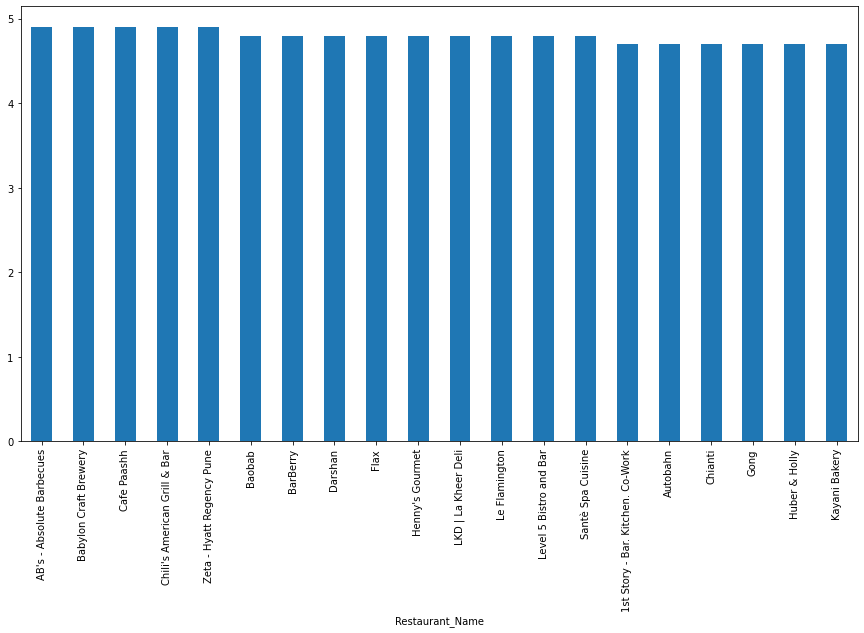

In [52]:
avg=z.groupby('Restaurant_Name')['Ratings_out_of_5'].mean().nlargest(20).plot.bar()
fig =plt.gcf()
fig.set_size_inches(15,8)


### Pune Nightlife

Text(0.5, 1.0, 'Nightlife in Pune restaurants')

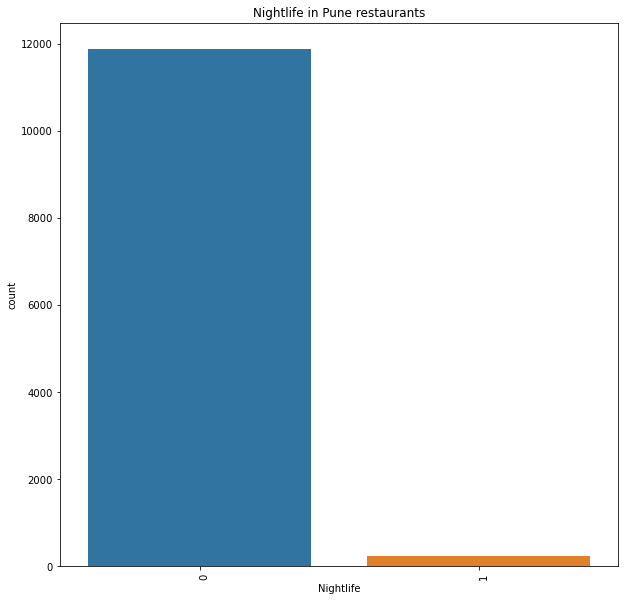

In [53]:
sns.countplot(z['Nightlife'])
sns.countplot(z['Nightlife']).set_xticklabels(sns.countplot(z['Nightlife']).get_xticklabels(),rotation=90,ha="left")
fig= plt.gcf()
fig.set_size_inches(10,10)
plt.title('Nightlife in Pune restaurants')

## Locality Based restaurant analysis

In [54]:
z.groupby('Locality')['Restaurant_Name'].unique()

Locality
Akurdi                   [Shawarma King, Hotel Silver Seven, Christy Re...
Around Pune              [Jose & Isabella's Italian Pizzas, Fruit Count...
Aundh                    [McDonald's, True Tramm Trunk, Sigree, Pink Tu...
B.T. Kawade Road         [Babu Khan Caterers - Biryani, Saffron Exotic ...
Balewadi                 [Lager Street - Lounge and Bar, Deewan Khana, ...
                                               ...                        
Wakad                    [Flechazo, Barbeque Nation - Sayaji Hotel, Bar...
Wanowrie                 [Swiss Bakes, Peter's Pan, Brownie Point, Cake...
Wanowrie Kondhwa Area    [Henny's Gourmet, Miya Bhai, Kafgir By Roghand...
Warje                    [Swarnaa Vegetarian, Supreme Momos, Hyderabadi...
Yerawada                 [Exotica, The Ritz-Carlton Tea Lounge, Baraza ...
Name: Restaurant_Name, Length: 99, dtype: object

In [55]:
restaurant=[] 
location=[]
for key,location_df in z.groupby('Locality'):
    location.append(key)
    restaurant.append(len(location_df['Restaurant_Name'].unique()))

In [56]:
df_total=pd.DataFrame(zip(location,restaurant)) #creating data frame
df_total.columns=['location','restaurant']
df_total.set_index('location',inplace=True)
df_total.sort_values(by='restaurant').tail(10)

,restaurant
location,
Pimpri,300
Chinchwad,310
Baner,383
Kharadi,447
Sinhgad Road,454
Viman Nagar,457
Hinjawadi,468
Wakad,518
Kothrud,547


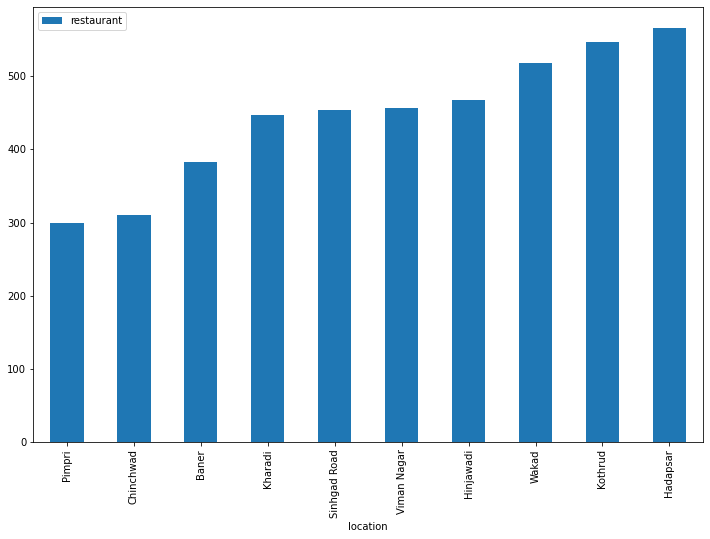

In [23]:
df_total.sort_values(by='restaurant').tail(10).plot.bar()
fig =plt.gcf()
fig.set_size_inches(12,8)

* This shows that Hadapsar has maximum number of restaurants

In [57]:
df_total.sort_values(by='restaurant').tail(10).index

Index(['Pimpri', 'Chinchwad', 'Baner', 'Kharadi', 'Sinhgad Road',
       'Viman Nagar', 'Hinjawadi', 'Wakad', 'Kothrud', 'Hadapsar'],
      dtype='object', name='location')

### Total number of Restaurants in particular Locality

Text(0.5, 1.0, 'No. of restaurants in a Location')

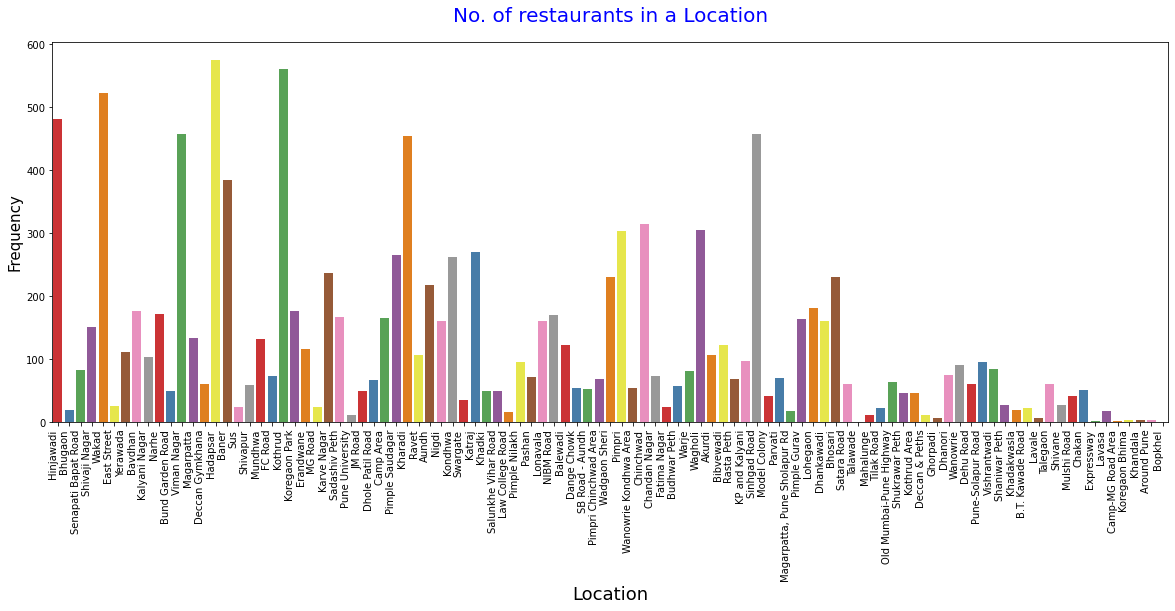

In [58]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x="Locality",data=zomato_real, palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Location",size=18)
loc
plt.title('No. of restaurants in a Location',size = 20,pad=20 , color='b')

### Rating and Locality

In [26]:
# pd.crosstab(z['Ratings_out_of_5'],z['Locality'])

### Most Popular Restaurant type in Pune

In [59]:
z['Sponsored'].value_counts()

Quick Bites                5446
Casual Dining              2262
Takeaway, Delivery         1065
Delivery                    905
Café                        333
                           ... 
Quick Bites, Food Court       1
Café, Beverage Shop           1
Food Truck, Quick Bites       1
Club, Lounge                  1
Dhaba, Bar                    1
Name: Sponsored, Length: 81, dtype: int64

Text(0.5, 1.0, 'Most popular Restaurant types of Pune')

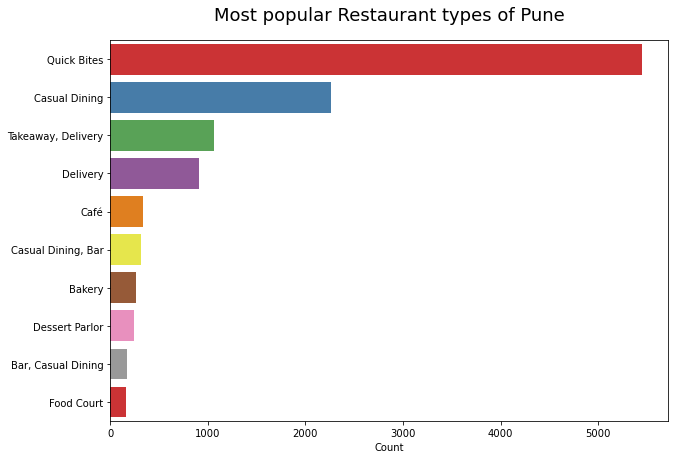

In [28]:
plt.figure(figsize=(10,7))
types=z['Sponsored'].value_counts()[:10]
sns.barplot(types,types.index,palette='Set1')
plt.xlabel('Count')
plt.title("Most popular Restaurant types of Pune" ,pad=20, fontsize=18)

### Types of Restaurants

Text(0.5, 1.0, 'Restaurant types')

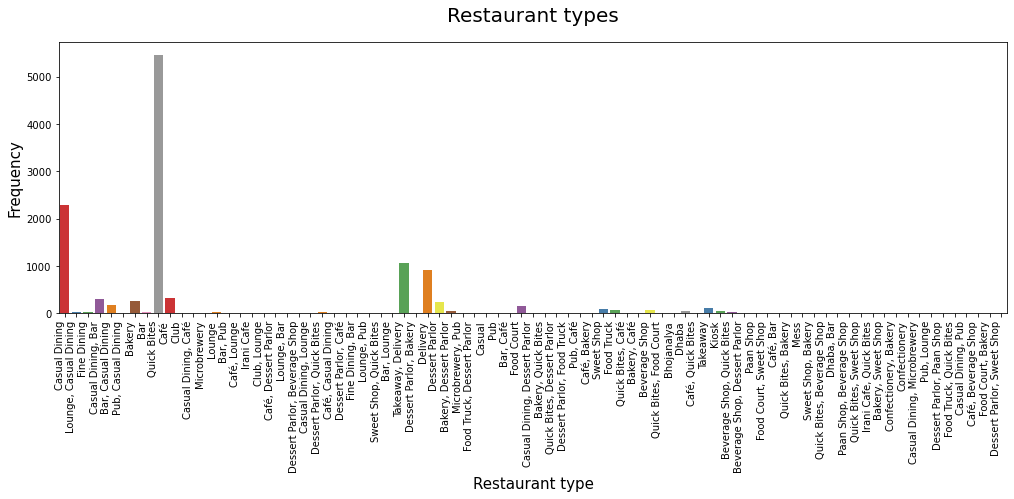

In [60]:
fig = plt.figure(figsize=(17,5))
rest = sns.countplot(x="Sponsored",data=zomato_real, palette = "Set1")
rest.set_xticklabels(rest.get_xticklabels(), rotation=90, ha="right")
plt.ylabel("Frequency",size=15)
plt.xlabel("Restaurant type",size=15)
rest 
plt.title('Restaurant types',fontsize = 20 ,pad=20)

### Most Popular Cuisines

Text(0.5, 1.0, 'Most popular Cuisines in Pune')

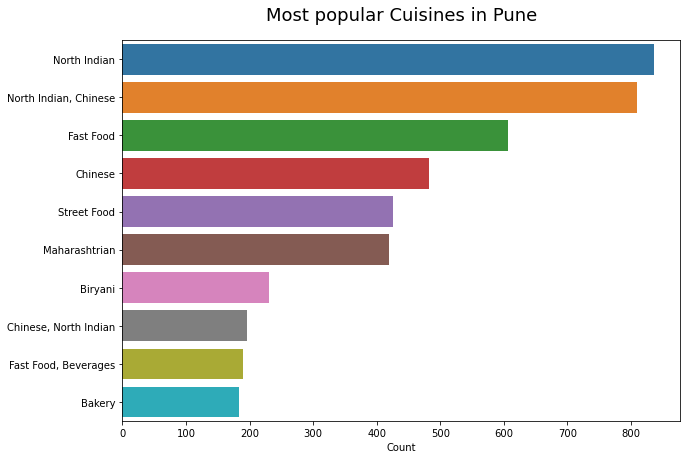

In [61]:
plt.figure(figsize=(10,7))
cuisines=z['Cuisines'].value_counts()[:10]
sns.barplot(cuisines,cuisines.index)
plt.xlabel('Count')
plt.title("Most popular Cuisines in Pune" ,pad=20, fontsize=18)

* We can observe that North Indian and Chinese food are the most popular amongst Punekars *

In [94]:
# zomato_real.columns.to_list()

### Cost For 2 people

In [97]:
# zomato_real['Charges_for_two'] = zomato_real['Charges_for_two'].apply(lambda x: x.replace('₹','')) 
# zomato_real['Charges_for_two'] = zomato_real['Charges_for_two'].apply(lambda x: x.replace(',',''))
# zomato_real['Charges_for_two'] = zomato_real['Charges_for_two'].apply(lambda x: x.replace('Not Present','0'))

In [98]:
zomato_real['Charges_for_two'].unique()

array([  1400,   1500,   2500,   1700,    150,   1300,   1000,    250,
         1800,   1600,    700,    900,   2000,    600,   1200,    550,
         2200,   1100,    500,    850,    300,   2100,    800,    400,
          450,    650,   1250,    950,    200,   3200,    350,    100,
            0,   1900,   3000,    750,   2600,   2700,   1050,   1350,
         4200,   4000, 200250,   2400,   1750,   3100,    420,   1150,
         1650,   2900,    999,   1950,   4500,    280,     50,   1550,
          160,    110,    220,    120,     15,   2800,   3500])

In [34]:
zomato_real['Charges_for_two']=zomato_real['Charges_for_two'].astype(int)

<AxesSubplot:xlabel='Charges_for_two', ylabel='Density'>

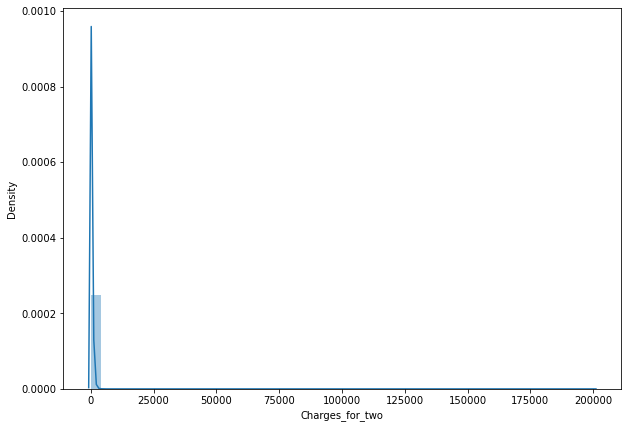

In [35]:
plt.figure(figsize=(10,7))
sns.distplot(zomato_real['Charges_for_two'])

<AxesSubplot:xlabel='Ratings_out_of_5', ylabel='Charges_for_two'>

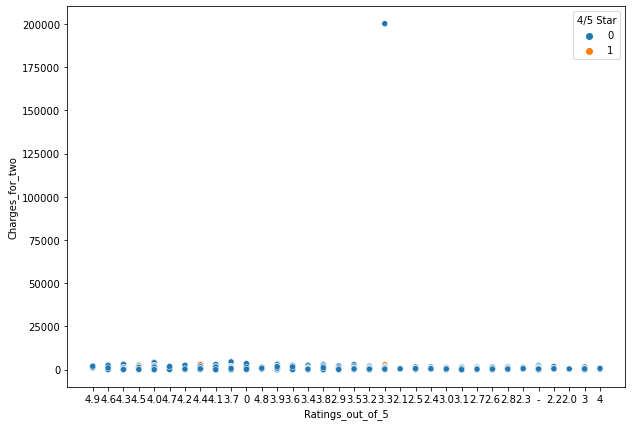

In [64]:
plt.figure(figsize=(10,7))


### Top 10 Expensive Restaurants in Pune

In [80]:
# zomato_real['Charges_for_two'].max()

data =zomato_real.copy()
data.set_index('Restaurant_Name',inplace=True)

In [88]:
# plt.figure(figsize=(10,7))
# data['Charges_for_two'].nlargest(10).plot.bar()

trace1 = go.Bar( 
        x = data['Charges_for_two'].nlargest(10).index,
        y = data['Charges_for_two'].nlargest(10),
        name= 'Priority')
iplot([trace1])

### Most Expensive Cuisines involved in expensive restaurants

In [77]:
zomato_real[zomato_real['Charges_for_two']>2500].loc[:,('Restaurant_Name','Cuisines')]

,Restaurant_Name,Cuisines
188,Coriander Kitchen - Conrad Pune,"North Indian, Asian, Mediterranean"
270,The House Of Medici - The Westin,"Asian, Continental"
331,Alto Vino - JW Marriott Pune,"Italian, Salad"
421,Feast - Sheraton Grand,"North Indian, Asian, European"
422,The Cafè - Hyatt Regency Pune,"North Indian, Asian, Continental"
451,Zeera - Conrad Pune,North Indian
585,Baan Tao - Hyatt Pune,"Chinese, Thai, Vietnamese, Malaysian, Asian, S..."
649,Oak Lounge - Marriott Suites Pune,Finger Food
842,Koji - Conrad Pune,"Chinese, Japanese, Thai"
981,Mix@36 - The Westin,"Finger Food, Asian, Continental, North Indian"


### Foodie areas in Pune

<AxesSubplot:xlabel='Locality'>

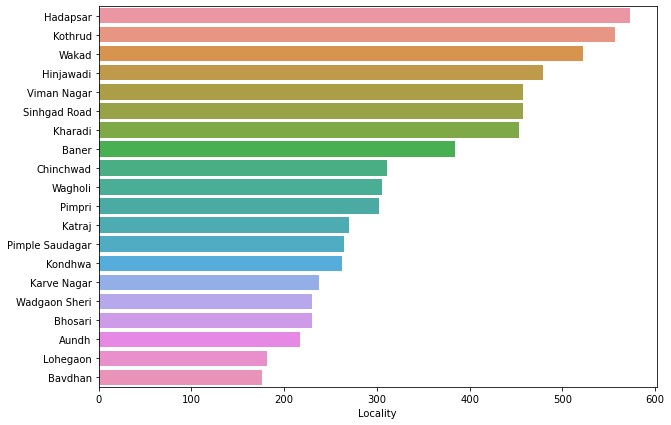

In [89]:
plt.figure(figsize=(10,7))
Restaurant_locations=z['Locality'].value_counts()[:20]
sns.barplot(Restaurant_locations,Restaurant_locations.index)

In [91]:
Restaurant_locations=z['Locality'].value_counts()[:20]
trace1 = go.Bar( 
        x = Restaurant_locations.index,
        y = Restaurant_locations,
        name= 'Priority')
iplot([trace1])

## Top restaurant chains in Pune

Text(0.5, 0, 'Number of outlets')

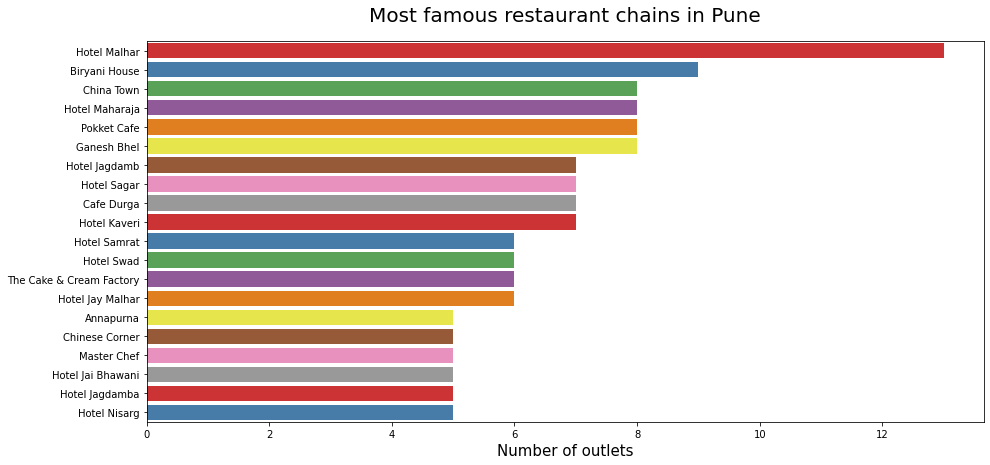

In [92]:
plt.figure(figsize=(15,7))
chains=zomato_real['Restaurant_Name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title("Most famous restaurant chains in Pune",size=20,pad=20)
plt.xlabel("Number of outlets",size=15)

* Most number of outlets are of Hotel Malhar, within Pune